<a href="https://colab.research.google.com/github/JaviCeRodriguez/Intro_Ciencia_Datos/blob/main/Parcial/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas shapely folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [3]:
!wget https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/arbolado-publico-lineal-2017-2018.csv
!wget https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/barrios.csv

--2022-10-10 00:19:27--  https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/arbolado-publico-lineal-2017-2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59724431 (57M) [text/plain]
Saving to: ‘arbolado-publico-lineal-2017-2018.csv’

arbolado-publico-li 100%[===================>]  56.96M   187MB/s    in 0.3s    

2022-10-10 00:19:28 (187 MB/s) - ‘arbolado-publico-lineal-2017-2018.csv’ saved [59724431/59724431]

--2022-10-10 00:19:28--  https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/barrios.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [4]:
df_arbolado = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')
df_arbolado.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [5]:
gdf_arbolado = gpd.GeoDataFrame(df_arbolado, geometry=gpd.points_from_xy(df_arbolado.long, df_arbolado.lat))
gdf_arbolado.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,POINT (-58.37856 -34.59490)
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,POINT (-58.38153 -34.59232)
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,POINT (-58.37910 -34.59194)
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,POINT (-58.38071 -34.59155)
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,POINT (-58.38071 -34.59155)


In [6]:
df_barrios = pd.read_csv('barrios.csv', sep=";")
df_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,MULTIPOLYGON (((-58.4528200492791 -34.59598865...,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,MULTIPOLYGON (((-58.4655768128541 -34.59655770...,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,MULTIPOLYGON (((-58.4237529813037 -34.59782733...,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,MULTIPOLYGON (((-58.4946097568899 -34.61486523...,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,MULTIPOLYGON (((-58.4128700313088 -34.61411625...,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


In [7]:
df_barrios['WKT'] = df_barrios["WKT"].apply(wkt.loads)
gdf_barrios = gpd.GeoDataFrame(df_barrios, geometry='WKT')

In [8]:
gdf_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...",PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...",VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


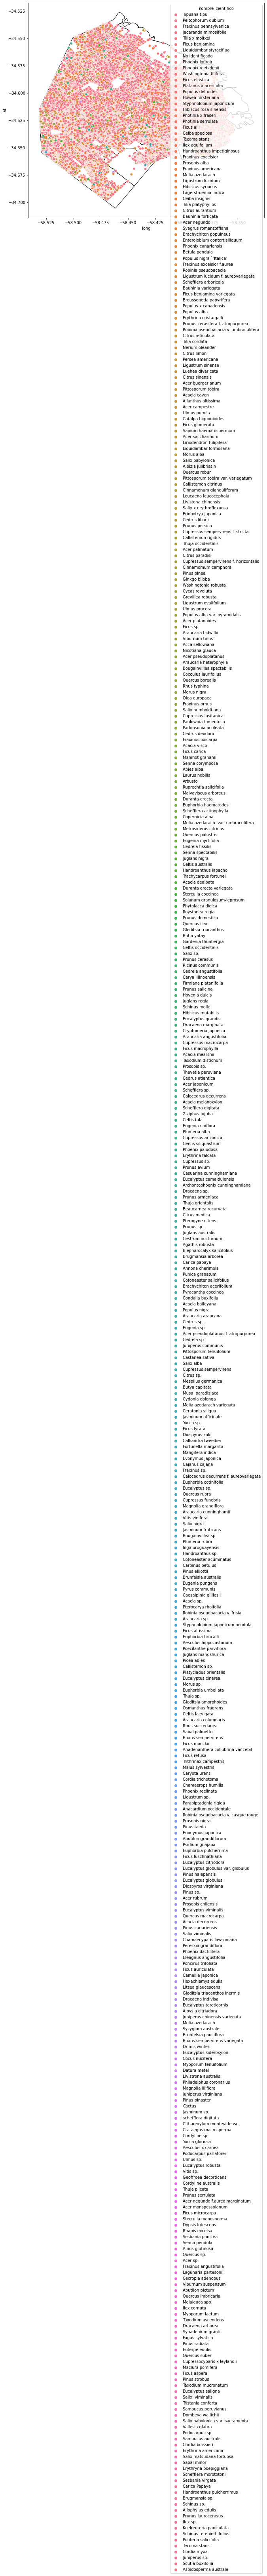

In [9]:
ax_barrios = gdf_barrios.plot(color="white", edgecolor="black", figsize=(20, 10))
sns.scatterplot(data=gdf_arbolado, x="long", y="lat", ax=ax_barrios, hue="nombre_cientifico")